# Preâmbulo

# Código

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl

In [3]:
def define_filtro_distancia(altura,largura):
    base_filter = np.zeros((altura,largura,2),np.float32)
    for x in range(0,altura):
        for y in range(0,largura):
            for z in range(0,2):
                base_filter[x][y][z] = np.sqrt((x - altura/2)**2 + (y - largura/2)** 2)
    
    return base_filter

In [4]:
def define_filtro_butterworth(filtro_distancia,limiar,n):
    altura, largura, profundidade = filtro_distancia.shape
    filtro_butterworth = np.zeros((altura,largura,profundidade),np.float32)
    for x in range(0,altura):
        for y in range(0,largura):
            for z in range(0,profundidade):
                filtro_butterworth[y][x][z] = 1/ (1 + (filtro_distancia[y][x][z]/limiar) ** (2 * n))
    
    return filtro_butterworth

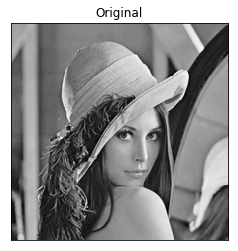

In [5]:
imgname = 'lenna.png'

img = cv2.imread(imgname,0)
plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.show()

In [7]:
altura, largura = img.shape
limiar = 30
n_butterworth = 10
filtro_distancia = define_filtro_distancia(altura,largura)

In [9]:
fourier_img = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
shift_img = np.fft.fftshift(fourier_img)

In [10]:
butterworth_filter = define_filtro_butterworth(filtro_distancia,limiar,n_butterworth)
filtered_img_butter = shift_img * butterworth_filter

butter_img = cv2.idft(np.fft.ifftshift(filtered_img_butter))
butter_img = cv2.magnitude(butter_img[:,:,0], butter_img[:,:,1])

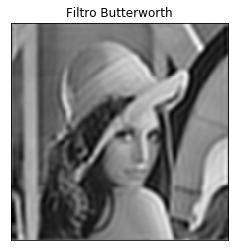

In [11]:
plt.imshow(butter_img,cmap = 'gray')
plt.title('Filtro Butterworth'), plt.xticks([]), plt.yticks([])
plt.show()

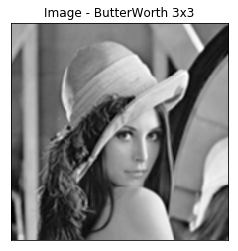

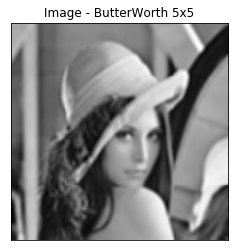

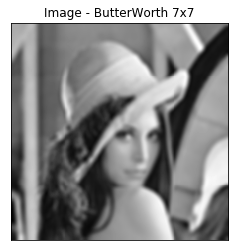

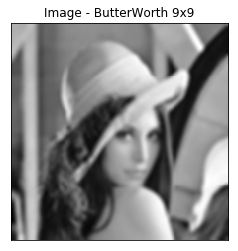

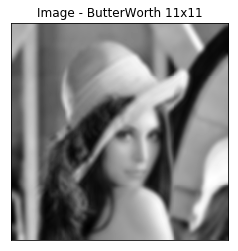

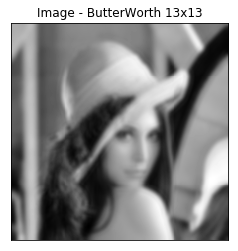

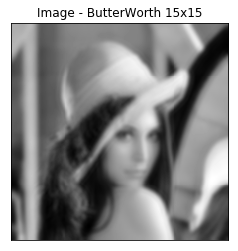

Gráfico N x SSE


ValueError: x and y must have same first dimension, but have shapes (7,) and (10,)

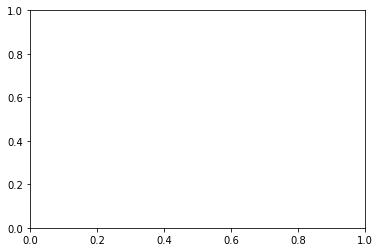

In [15]:
trans_filter = cv2.idft(np.fft.ifftshift(butterworth_filter))
butter_spacial = cv2.magnitude(trans_filter[:,:,0], trans_filter[:,:,1])

index = range(3,17,2)
results = np.zeros(10,dtype='float64')
for i in index:
    k = i // 2
    temp = np.roll(np.roll(butter_spacial,k,axis=0),k,axis=1)
    aprox_filter = np.zeros((i,i),dtype='float64')
    for x in range(0,i):
        for y in range(0,i):
            aprox_filter[y][x] = temp[y][x]
    img_result = cv2.filter2D(img, cv2.CV_32F,aprox_filter)
    plt.imshow(img_result,cmap = 'gray')
    plt.title('Image - ButterWorth ' + str(i) + 'x' + str(i)), plt.xticks([]), plt.yticks([])
    plt.show()
    cur_result = np.sum((butter_img - img_result) ** 2)
    results[k-1] = cur_result
    
print('Gráfico N x SSE')
plt.plot(index,results)
plt.show()

# Resultados

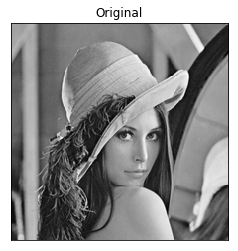

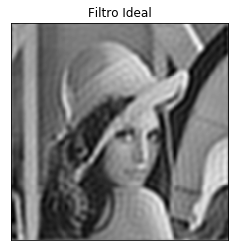

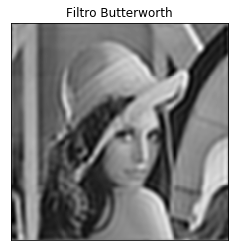

# Análises

Como podemos observar o filtro ideal apresenta uma suavização da imagem, poreḿ ele tambem gera imagens mais espúrias, isso devido ao fenomeno de Gibs.

Já o filtro Butterworth apresenta uma melhora das distorções em relação ao filtro ideal, porém ainda apresenta um resquicio de fantasmas na imagem gerada.